## SI 670 Applied Machine Learning, Week 6:  Naive Bayes, Pipeline, High Dimension, Density Estimation. (Due 10/19 11:59pm)

For this assignment, each question is worth 20 points, for a total of 60 points. Correct answers and code receive full credit, but partial credit will be awarded if you have the right idea even if your final answers aren't quite right.

Submit your completed notebook file AND corresponding **HTML** file to the Canvas site.

As a reminder, the notebook code you submit must be your own work. Feel free to discuss general approaches to the homework with classmates: if you end up forming more of a team discussion on multiple questions, please include the names of the people you worked with at the top of your notebook file.


### Put your name here: Martin Zanaj

### Put your uniquename here: mzanaj

### Question 1 (20 points)

Please write the answers as well as your derivation process of the following questions. You can use either LaTeX or python code to represent your answer. For example, if you want to present <$x_1^2$>, in the LaTeX format you should write <(dollar sign) x_1^2 (dollar sign)>; in the python code format you should write <\`x_1\*\*2\`>. See [here](https://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/) for how to represent more mathmatical symbols in LaTeX format.

**Calculate the unnormalized posterior probability of a naive Bayes classifier**

Suppose you have a dataset with 2 features $X_1, X_2$ and a binary label $Y$. $X_1$ and $Y$ takes value either 0 or 1. $X_2$ takes one out of the three possible values $0, 1$, or $2$.

Based on the dataset, you know 

$p(Y=0) = 0.05$, 

$p(X_1=0 | Y=0) = 0.6$, $p(X_1=0 | Y=1) = 0.3$, 

$p(X_2=0 | Y=0) = 0.9$, $p(X_2=1 | Y=0) = 0.05$, $p(X_2=0 | Y=1) = 0.1$, $p(X_2=1 | Y=1) = 0.3$. 

Please calculate the unnormalized posterior probability of a naive Bayes classifier: 
$$\hat{p}(Y=1 | X) = p(X | Y=1) p(Y=1)$$ and $$\hat{p}(Y=0 | X) = p(X | Y=0) p(Y=0)$$ of the following data points.

#### (a) (10 points) $X_1 = 1, X_2 = 0$



#### (b) (10 points) $X_1 = 0, X_2 = 2$



### Answer 1

*Refer to picture for work*

(a)
> $$\hat{p}(Y=1 | X) = p(X | Y=1) p(Y=1)= p(X_1=1| Y=1)p(X_2=0| Y=1)p(Y=1) = 0.0665$$
$$\hat{p}(Y=0 | X) = p(X | Y=0) p(Y=0) p(X_1=1| Y=0)p(X_2=0| Y=0)p(Y=0)= 0.018$$ 

(b)

>$$\hat{p}(Y=1 | X) = p(X | Y=1) p(Y=1)= p(X_1=0| Y=1)p(X_2=2| Y=1) p(Y=1) = 0.171$$
$$\hat{p}(Y=0 | X) = p(X | Y=0) p(Y=0) p(X_1=0| Y=0)p(X_2=2| Y=0) p(Y=0)= 0.0015$$ 



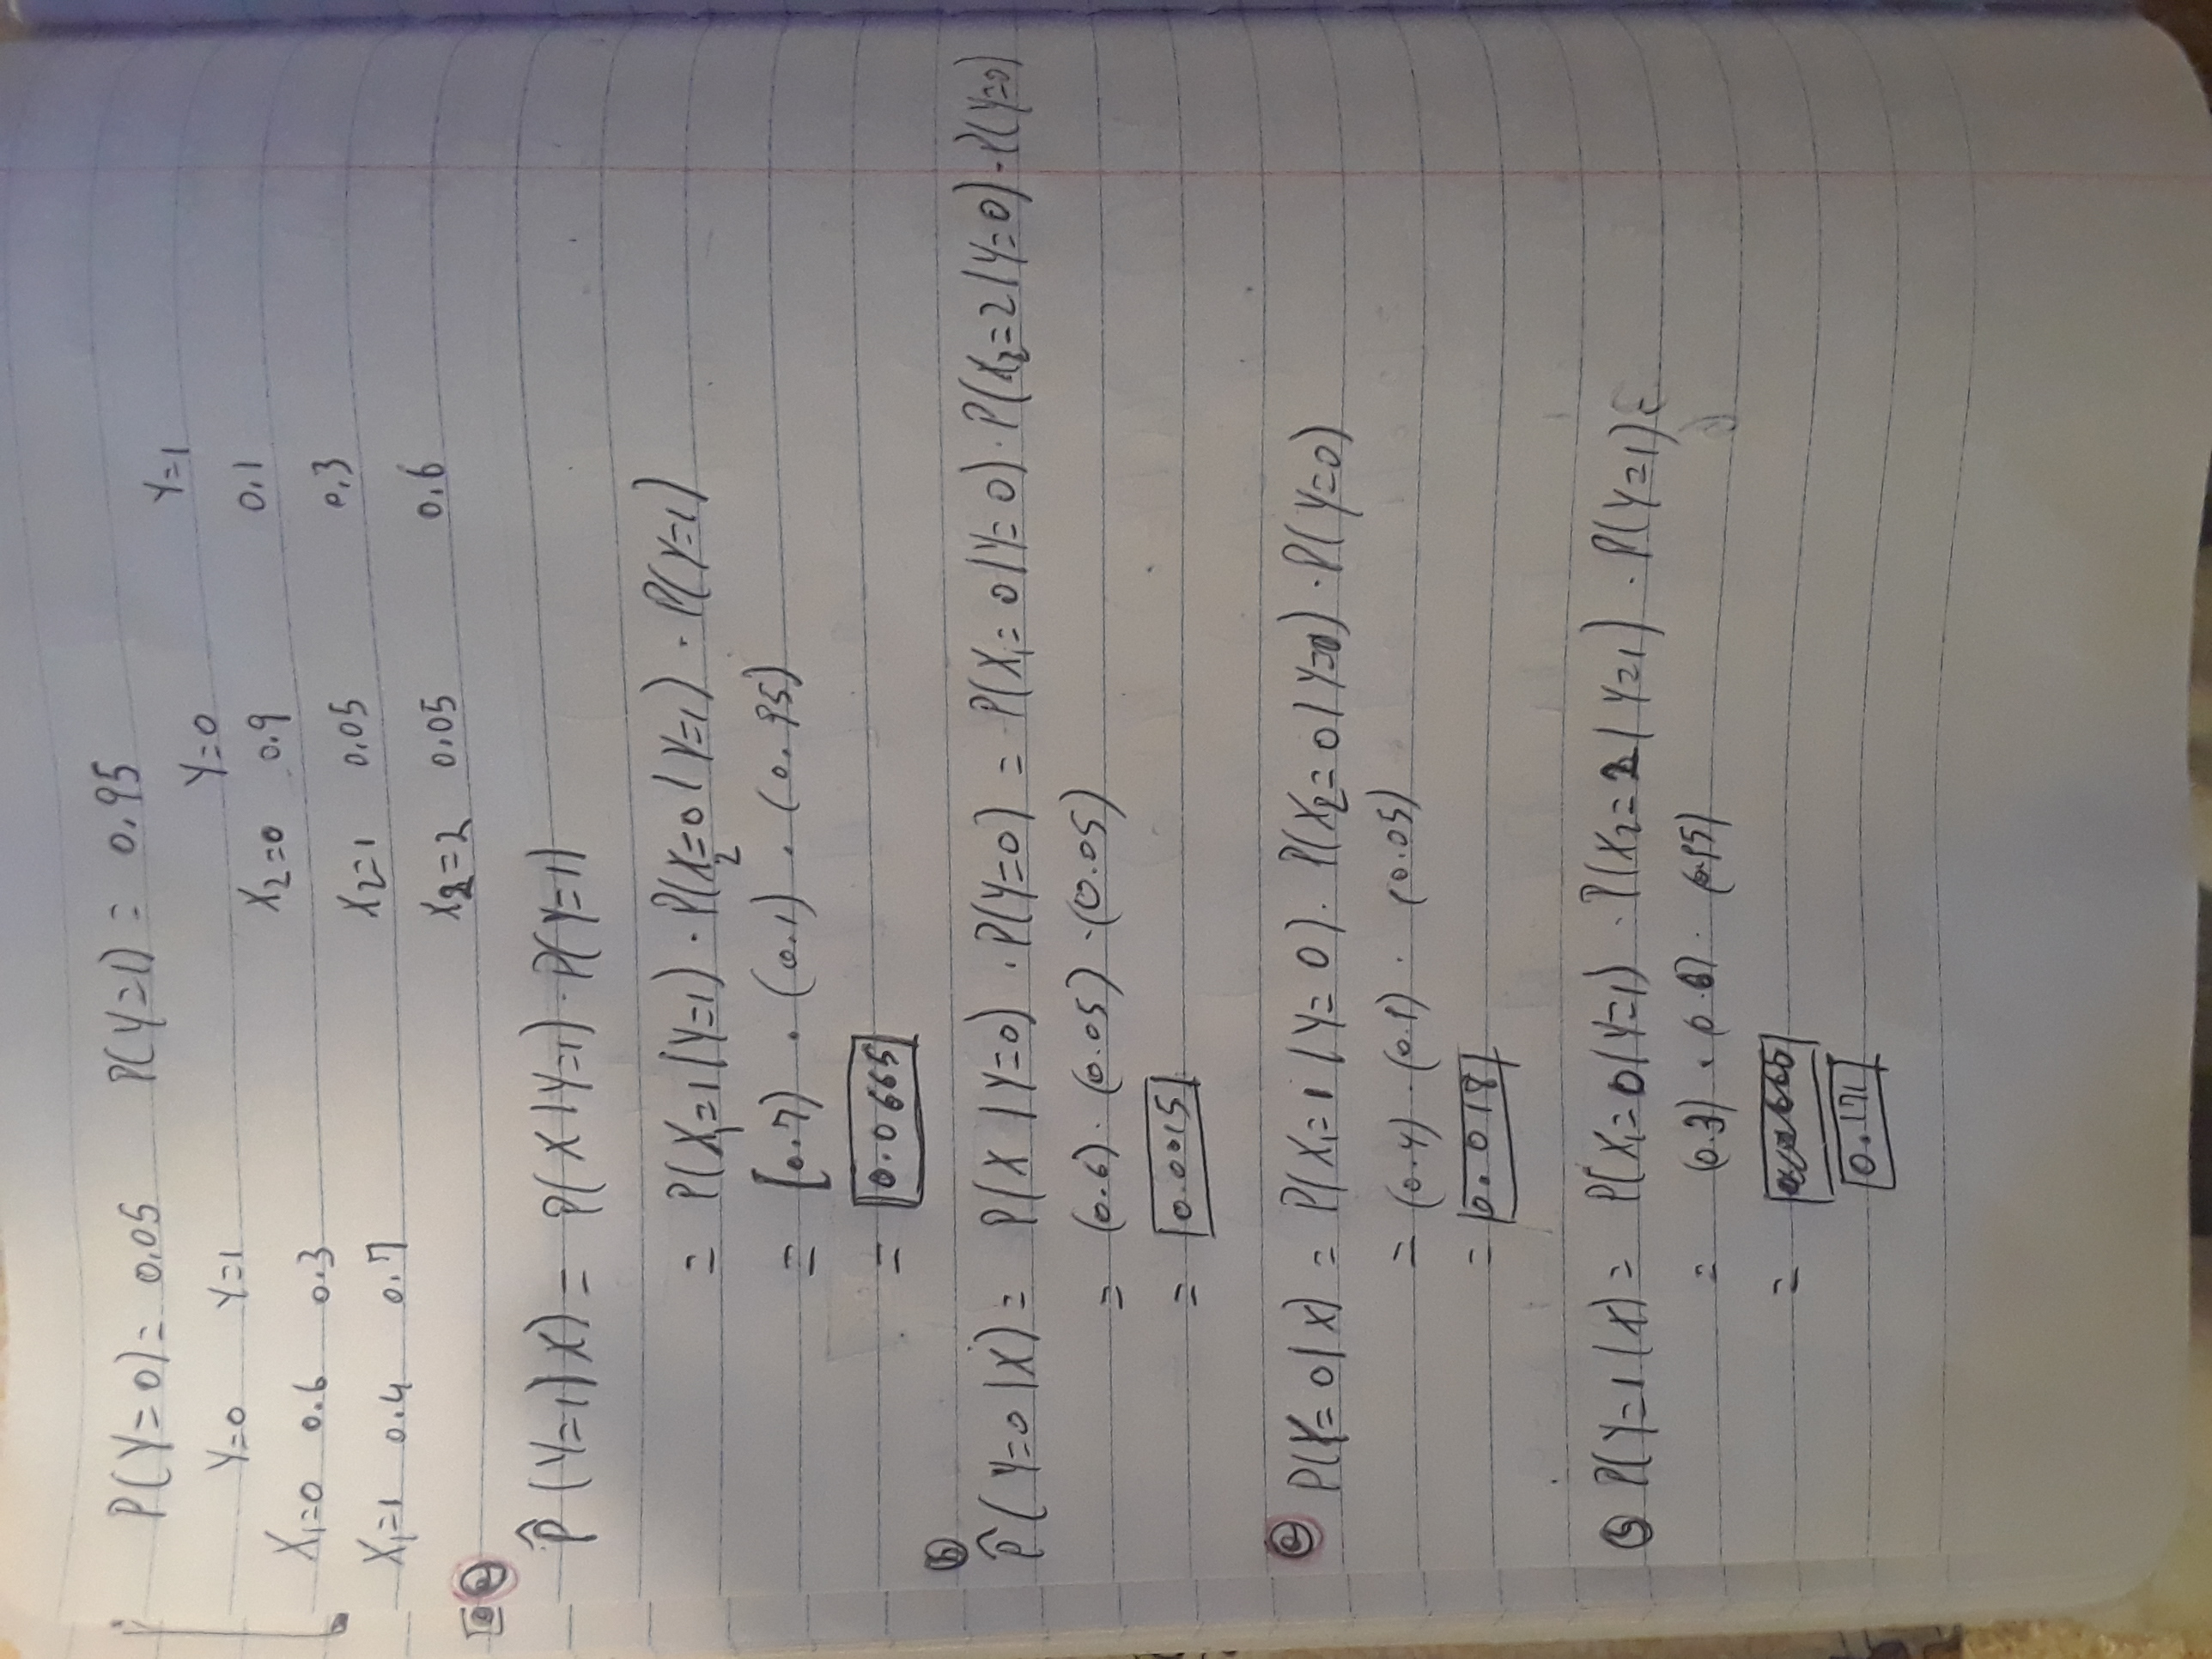

### Question 2 (20 points)

Build a pipeline that first applies the MinMaxScaler to the data and then use the linearSVC. After that, apply the GridSearchCV by using pipeline as the estimator to search the hyper-parameter `C` of the `LinearSVC` classifier.

Return a number `test_score`, where `test_score` is the accuracy score you get from your final model on `(X_test, y_test)`.

The grid search range of the parameter is given in `param_grid`.

*Hint1: The `GridSearchCV` itself can be viewed as a classifier or a regressor because it implements `.fit` and `.score` functions.*

*Hint2: The correct way to combine `GridSearchCV` and `Pipeline` is: you can grid search a pipeline with the scaler and the classifier.*

*Hint3: You could refer to the offical document about how to use it: https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html*

In [1]:
def answer_two():
    from sklearn.pipeline import Pipeline
    from sklearn.svm import LinearSVC
    from sklearn.datasets import load_breast_cancer
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import train_test_split

    #Data
    (X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
    X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

    #Parameters
    param_grid = [{'LinerSVC__C': [0.1, 1, 10, 100], }]

    #Pipeline
    pipe = Pipeline([('scalar',MinMaxScaler()),('LinerSVC',LinearSVC())])
    
    #Apply GridSearchCV 
    CV_LinearSVC = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=-1)
    
    #Fit
    CV_LinearSVC.fit(X_train, y_train)
    
    #Score
    test_score = CV_LinearSVC.score(X_test, y_test)
    
    return test_score

answer_two()

0.958041958041958

### Question 3 (20 points)
In this question, we hope to compare the GradientBoostingRegressor, AdaBoostRegressor, and XGBRegressor. In lab 6, we have given you an example about how to use XGBRegressor. Similiar to that, we hope you to explore how to use GradientBoostingRegressor and AdaBoostRegressor to predict the boston housing price. 

We would use random_state=0, n_estimators = 50 for three regressor. 

You are supposed to return three numbers: the mean_squared_error of XGBRegressor, the mean_squared_error of GradientBoostingRegressor, the mean_squared_error of AdaBoostRegressor.


In [6]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")

#import the Boston Housing dataset and store it in a variable called boston
boston = load_boston()
print(boston.keys())
print(boston.data.shape)

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

#get the y label, i.e., price 
data['PRICE'] = boston.target

#get the X, y data
X, y = data.iloc[:,:-1],data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

def answer_three():
    #Regressors
    xg_reg = xgb.XGBRegressor(random_state=0, n_estimators = 50)
    ada_reg = AdaBoostRegressor(random_state=0, n_estimators = 50)
    gb_reg = GradientBoostingRegressor(random_state=0, n_estimators = 50)

    #Fit
    xg_reg.fit(X_train,y_train)
    ada_reg.fit(X_train,y_train)
    gb_reg.fit(X_train,y_train)

    #Prediction
    preds = xg_reg.predict(X_test)
    preds2 = ada_reg.predict(X_test)
    preds3 = gb_reg.predict(X_test)
    
    #Error
    xg_rmse = np.sqrt(mean_squared_error(y_test, preds))
    gra_rmse = np.sqrt(mean_squared_error(y_test, preds2))
    ada_rmse = np.sqrt(mean_squared_error(y_test, preds3))
    
    return xg_rmse, gra_rmse, ada_rmse

answer_three()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
[02:35:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(4.80993122629074, 5.286321698508684, 4.402475712441904)